In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
X = np.random.randn(100,1) # 100 rows, 1 Columns

In [14]:
Y = 3 + 4*X + np.random.randn(100,1)

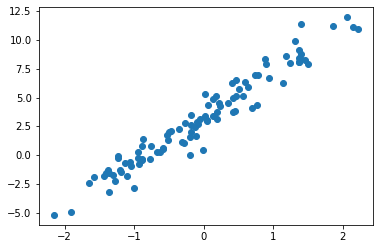

In [15]:
plt.scatter(X,Y)

This is the plot, and for this plot we need to find the best fit line. That is, we need to apply linear regression into it.

WITHOUT REGULARISATION

In [16]:
def cost_func(y_actual, y_predicted):
    cost = sum((y_predicted - y_actual)**2)/(2*len(X))
    return cost

In [17]:
def gradient_descent(X, Y, iters=1000, lr=0.01, stopping_threshold=1e-6):
    initial_M = 0.1
    initial_C = 0.001
    
    Ms = []
    Cs = []
    
    costs =[]
    
    previous_cost = 0
    y_predicted=0
    for i in range(iters):
        y_predicted  = (initial_M*(X)) + initial_C
    
        present_cost     = cost_func(Y, y_predicted)
    
        if((abs(present_cost - previous_cost)) < stopping_threshold )==True:
            break
    
        previous_cost = present_cost
        costs.append(present_cost)
        
        partial_derM = (1/(len(X)))*np.sum((y_predicted - Y)*X)
        partial_derC = (1/(len(X)))*np.sum(y_predicted - Y)
        
        initial_M = initial_M - lr *(partial_derM)
        initial_C = initial_C - lr *(partial_derC)
        
        Ms.append(initial_M)
        Cs.append(initial_C)
    
    costs = np.array(costs)
    Ms = np.array(Ms)
    Cs = np.array(Cs)
    return initial_M,initial_C,Ms,Cs,costs,y_predicted

In [18]:
M,C,Ms,Cs,costs,y_predicted = gradient_descent(X,Y)

In [19]:
M

3.863821378023794

In [20]:
C

3.282555095908267

In [21]:
costs[:5]

array([[12.20275096],
       [11.9825095 ],
       [11.76638957],
       [11.55431404],
       [11.34620721]])

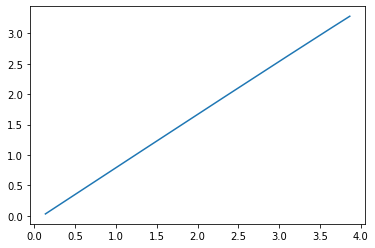

In [22]:
plt.plot(Ms,Cs)

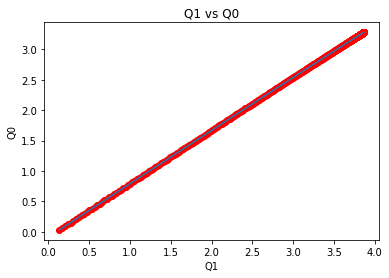

In [23]:
plt.plot(Ms, Cs)
plt.title("Q1 vs Q0")
plt.ylabel("Q0")
plt.xlabel("Q1")
plt.scatter(Ms, Cs, marker='o', color='red')

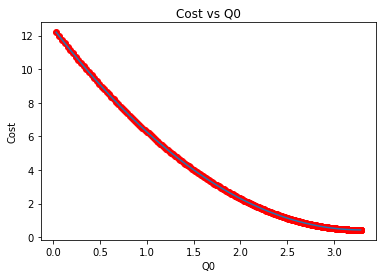

In [24]:
plt.plot(Cs,costs)
plt.title("Cost vs Q0")
plt.ylabel("Cost")
plt.xlabel("Q0")
plt.scatter(Cs, costs, marker='o', color='red')

Text(0.5, 1.0, 'Best Fit Line')

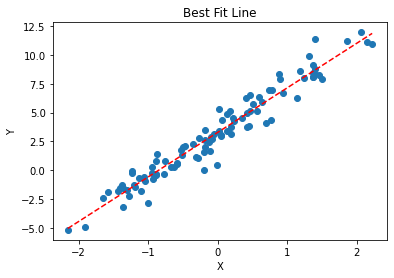

In [25]:
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='red',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Best Fit Line")

WITH REGULARISATION

In [5]:
para = 0.1
def cost_func(y_actual, y_predicted,q1,q0):
    cost = sum((y_predicted - y_actual)**2)/(2*len(X))+(para * ((q1*q1) + (q0*q0)))
    return cost

In [6]:
def gradient_descent(X, Y, iters=1000, lr=0.01, stopping_threshold=1e-6):
    initial_M = 0.1
    initial_C = 0.001
    
    Ms = []
    Cs = []
    n = float(len(X))
    costs =[]
    
    previous_cost = 0
    y_predicted=0
    
    for i in range(iters):
        y_predicted  = (initial_M*(X)) + initial_C
    
        present_cost     = cost_func(Y, y_predicted,initial_M,initial_C)
            
        if previous_cost and abs(previous_cost - present_cost) <= stopping_threshold :
            break
         
        previous_cost = present_cost
        costs.append(present_cost)
        
        partial_derM = (1/n)*np.sum((y_predicted - Y)*X)
        partial_derC = (1/n)*np.sum(y_predicted - Y)
        
        initial_M = initial_M - lr *(partial_derM)+ (para * initial_M)/n
        initial_C = initial_C - lr *(partial_derC)+ (para * initial_M)/n
        
        Ms.append(initial_M)
        Cs.append(initial_C)
      
        print("Iteration : ",i," :\t Qo = ",initial_M,"\t Q1 = ",initial_C)
         
    
    costs = np.array(costs)
    Ms = np.array(Ms)
    Cs = np.array(Cs)
    return initial_M,initial_C,Ms,Cs,costs,y_predicted

In [7]:
M,C,Ms,Cs,costs,y_predicted = gradient_descent(X,Y)

Iteration :  0  :	 Qo =  0.129575878689184 	 Q1 =  0.02645360748196989
Iteration :  1  :	 Qo =  0.15897025964841394 	 Q1 =  0.05172350350353874
Iteration :  2  :	 Qo =  0.1881842181339051 	 Q1 =  0.0768110905127143
Iteration :  3  :	 Qo =  0.21721882347164032 	 Q1 =  0.10171775950858164
Iteration :  4  :	 Qo =  0.24607513908487347 	 Q1 =  0.1264448901415824
Iteration :  5  :	 Qo =  0.27475422252157133 	 Q1 =  0.1509938508128574
Iteration :  6  :	 Qo =  0.3032571254817934 	 Q1 =  0.17536599877266162
Iteration :  7  :	 Qo =  0.3315848938450084 	 Q1 =  0.19956268021786053
Iteration :  8  :	 Qo =  0.3597385676973465 	 Q1 =  0.2235852303885171
Iteration :  9  :	 Qo =  0.38771918135878747 	 Q1 =  0.24743497366357844
Iteration :  10  :	 Qo =  0.41552776341028236 	 Q1 =  0.27111322365567053
Iteration :  11  :	 Qo =  0.4431653367208097 	 Q1 =  0.29462128330501003
Iteration :  12  :	 Qo =  0.47063291847436384 	 Q1 =  0.3179604449724424
Iteration :  13  :	 Qo =  0.4979315201968761 	 Q1 =  0.34113

Iteration :  155  :	 Qo =  3.064587595228953 	 Q1 =  2.4076554537690145
Iteration :  156  :	 Qo =  3.075768007212627 	 Q1 =  2.416141527485456
Iteration :  157  :	 Qo =  3.0868782172283775 	 Q1 =  2.424569512325364
Iteration :  158  :	 Qo =  3.0979186593448973 	 Q1 =  2.432939821069874
Iteration :  159  :	 Qo =  3.1088897650220675 	 Q1 =  2.4412528634118202
Iteration :  160  :	 Qo =  3.1197919631257855 	 Q1 =  2.449509045980366
Iteration :  161  :	 Qo =  3.1306256799427197 	 Q1 =  2.4577087723654327
Iteration :  162  :	 Qo =  3.1413913391949904 	 Q1 =  2.4658524431419107
Iteration :  163  :	 Qo =  3.1520893620547747 	 Q1 =  2.4739404558936675
Iteration :  164  :	 Qo =  3.1627201671588385 	 Q1 =  2.4819732052373533
Iteration :  165  :	 Qo =  3.173284170622997 	 Q1 =  2.489951082845998
Iteration :  166  :	 Qo =  3.1837817860564988 	 Q1 =  2.4978744774724104
Iteration :  167  :	 Qo =  3.194213424576342 	 Q1 =  2.5057437749723768
Iteration :  168  :	 Qo =  3.2045794948215116 	 Q1 =  2.5135

Iteration :  287  :	 Qo =  4.068672499577813 	 Q1 =  3.1493549585203073
Iteration :  288  :	 Qo =  4.073519652370442 	 Q1 =  3.1528283225992033
Iteration :  289  :	 Qo =  4.078336081693481 	 Q1 =  3.156278559414412
Iteration :  290  :	 Qo =  4.083121980729326 	 Q1 =  3.1597058266704914
Iteration :  291  :	 Qo =  4.087877541462896 	 Q1 =  3.16311028095755
Iteration :  292  :	 Qo =  4.092602954688858 	 Q1 =  3.1664920777595262
Iteration :  293  :	 Qo =  4.097298410018826 	 Q1 =  3.169851371462396
Iteration :  294  :	 Qo =  4.101964095888503 	 Q1 =  3.1731883153623226
Iteration :  295  :	 Qo =  4.106600199564787 	 Q1 =  3.1765030616737375
Iteration :  296  :	 Qo =  4.111206907152842 	 Q1 =  3.179795761537358
Iteration :  297  :	 Qo =  4.1157844036031195 	 Q1 =  3.1830665650281436
Iteration :  298  :	 Qo =  4.120332872718347 	 Q1 =  3.1863156211631876
Iteration :  299  :	 Qo =  4.124852497160472 	 Q1 =  3.189543077909547
Iteration :  300  :	 Qo =  4.129343458457565 	 Q1 =  3.19274908219201

Iteration :  475  :	 Qo =  4.6014105681229145 	 Q1 =  3.523840736193893
Iteration :  476  :	 Qo =  4.602870809876392 	 Q1 =  3.524844859310938
Iteration :  477  :	 Qo =  4.60432173675997 	 Q1 =  3.525842437647259
Iteration :  478  :	 Qo =  4.60576340799773 	 Q1 =  3.52683351434664
Iteration :  479  :	 Qo =  4.607195882439352 	 Q1 =  3.5278181322632376
Iteration :  480  :	 Qo =  4.608619218562454 	 Q1 =  3.5287963339635837
Iteration :  481  :	 Qo =  4.610033474474931 	 Q1 =  3.529768161728567
Iteration :  482  :	 Qo =  4.611438707917257 	 Q1 =  3.5307336575554076
Iteration :  483  :	 Qo =  4.612834976264795 	 Q1 =  3.5316928631596105
Iteration :  484  :	 Qo =  4.6142223365300765 	 Q1 =  3.5326458199769117
Iteration :  485  :	 Qo =  4.615600845365079 	 Q1 =  3.533592569165205
Iteration :  486  :	 Qo =  4.616970559063481 	 Q1 =  3.5345331516064573
Iteration :  487  :	 Qo =  4.618331533562907 	 Q1 =  3.5354676079086116
Iteration :  488  :	 Qo =  4.619683824447157 	 Q1 =  3.536395978407472


Iteration :  614  :	 Qo =  4.736235474934828 	 Q1 =  3.6159176540643894
Iteration :  615  :	 Qo =  4.736834781189913 	 Q1 =  3.6163238362652463
Iteration :  616  :	 Qo =  4.737430256174536 	 Q1 =  3.616727391634224
Iteration :  617  :	 Qo =  4.738021924339138 	 Q1 =  3.6171283372659326
Iteration :  618  :	 Qo =  4.7386098099785885 	 Q1 =  3.617526690142582
Iteration :  619  :	 Qo =  4.7391939372331615 	 Q1 =  3.617922467134733
Iteration :  620  :	 Qo =  4.739774330089524 	 Q1 =  3.6183156850020435
Iteration :  621  :	 Qo =  4.740351012381702 	 Q1 =  3.6187063603940093
Iteration :  622  :	 Qo =  4.740924007792049 	 Q1 =  3.6190945098507004
Iteration :  623  :	 Qo =  4.741493339852207 	 Q1 =  3.6194801498034925
Iteration :  624  :	 Qo =  4.742059031944059 	 Q1 =  3.6198632965757938
Iteration :  625  :	 Qo =  4.742621107300679 	 Q1 =  3.620243966383763
Iteration :  626  :	 Qo =  4.743179589007275 	 Q1 =  3.62062217533703
Iteration :  627  :	 Qo =  4.743734500002122 	 Q1 =  3.6209979394394

Iteration :  750  :	 Qo =  4.790785626780064 	 Q1 =  3.6527558818711117
Iteration :  751  :	 Qo =  4.791036015704397 	 Q1 =  3.6529242975130014
Iteration :  752  :	 Qo =  4.791284802129715 	 Q1 =  3.6530916285326036
Iteration :  753  :	 Qo =  4.791531996302613 	 Q1 =  3.653257881939089
Iteration :  754  :	 Qo =  4.791777608404271 	 Q1 =  3.6534230646960717
Iteration :  755  :	 Qo =  4.792021648550869 	 Q1 =  3.6535871837219087
Iteration :  756  :	 Qo =  4.792264126794005 	 Q1 =  3.653750245889994
Iteration :  757  :	 Qo =  4.792505053121103 	 Q1 =  3.6539122580290577
Iteration :  758  :	 Qo =  4.792744437455823 	 Q1 =  3.654073226923455
Iteration :  759  :	 Qo =  4.792982289658465 	 Q1 =  3.6542331593134603
Iteration :  760  :	 Qo =  4.793218619526376 	 Q1 =  3.6543920618955537
Iteration :  761  :	 Qo =  4.7934534367943495 	 Q1 =  3.6545499413227107
Iteration :  762  :	 Qo =  4.793686751135021 	 Q1 =  3.6547068042046855
Iteration :  763  :	 Qo =  4.793918572159267 	 Q1 =  3.65486265710

Iteration :  891  :	 Qo =  4.814084627916358 	 Q1 =  3.668395873203049
Iteration :  892  :	 Qo =  4.814185858475642 	 Q1 =  3.668463676285066
Iteration :  893  :	 Qo =  4.8142864407543895 	 Q1 =  3.668531043723482
Iteration :  894  :	 Qo =  4.814386378902183 	 Q1 =  3.6685979783224827
Iteration :  895  :	 Qo =  4.814485677042066 	 Q1 =  3.6686644828681483
Iteration :  896  :	 Qo =  4.814584339270712 	 Q1 =  3.6687305601285702
Iteration :  897  :	 Qo =  4.814682369658591 	 Q1 =  3.6687962128539686
Iteration :  898  :	 Qo =  4.814779772250143 	 Q1 =  3.6688614437768075
Iteration :  899  :	 Qo =  4.814876551063937 	 Q1 =  3.66892625561191
Iteration :  900  :	 Qo =  4.814972710092842 	 Q1 =  3.6689906510565744
Iteration :  901  :	 Qo =  4.8150682533041875 	 Q1 =  3.6690546327906848
Iteration :  902  :	 Qo =  4.815163184639928 	 Q1 =  3.6691182034768266
Iteration :  903  :	 Qo =  4.815257508016806 	 Q1 =  3.669181365760399
Iteration :  904  :	 Qo =  4.815351227326511 	 Q1 =  3.6692441222697

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
costs.shape

(1000, 1)

In [10]:
Ms.shape

(1000,)

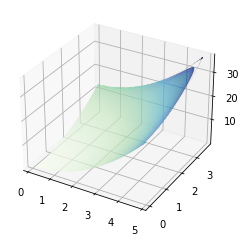

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = Ms
Y = Cs
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
surface = ax.plot_surface(X, Y, Z,
                          cmap='GnBu',
                          rstride = 2,
                          cstride = 2)